# NBA GOAT Debate Analysis

### Links used for the data: 
- https://www.basketball-reference.com/about/glossary.html

- https://www.basketball-reference.com/playoffs/

- https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning and Concatenation

In [3]:
df = pd.read_csv("NBA Champions.csv")
stats = pd.read_csv("NBA Stats (1947-present)/Advanced.csv")
stats = stats[[
    'season', 'player', 'age', 'experience', 'tm', 'g', 'mp', 
    'per','ts_percent', 'f_tr', 'orb_percent', 'drb_percent',
    'trb_percent', 'ast_percent', 'stl_percent', 'blk_percent',
    'tov_percent', 'usg_percent', 'ows', 'dws', 'ws',
    'obpm', 'dbpm', 'bpm', 'vorp']][stats.player.isin(["LeBron James", "Michael Jordan"])]

dic = {"CHI":"Chicago Bulls", "WAS":"Washington Wizards", "MIA":"Miami Heat", "LAL":"Los Angeles Lakers", "CLE":"Cleveland Cavaliers"}
dic_2 = {"L. James":"LeBron James", "M. Jordan": "Michael Jordan"}
combined = stats.merge(df, left_on="season", right_on="Year")
combined["tm"] = combined.tm.map(dic)
combined["champion"] = combined.tm == combined.Champion
combined["finals_mvp"] = combined.player == combined["Finals MVP"].map(dic_2)
combined["runner_up"] = combined.tm == combined["Runner-Up"]

def split_name_value(df, col):
    df[[col + '_name', col + '_value']] = df[col].str.extract(r'([A-Za-z. \'\-]+)\s*\((\d+\.?\d*)\)')
    df[col + '_name'] = df[col + '_name'].apply(lambda x: ' '.join([name.capitalize() for name in x.split()]))
    df[col + '_value'] = pd.to_numeric(df[col + '_value'])
    df.drop(columns=[col], inplace=True)
    return df

columns_to_process = ['Points', 'Rebounds', 'Assists', 'Win Shares']
for col in columns_to_process:
    combined = split_name_value(combined, col)

combined[["Points_name", "Rebounds_name", "Assists_name", "Win Shares_name"]] = combined[["Points_name", "Rebounds_name", "Assists_name", "Win Shares_name"]].map(dic_2.get)
combined = combined.drop(['Year', 'Champion', 'Runner-Up', 'Finals MVP', 'f_tr'], axis=1)
combined.head()

,season,player,age,experience,tm,g,mp,per,ts_percent,orb_percent,...,finals_mvp,runner_up,Points_name,Points_value,Rebounds_name,Rebounds_value,Assists_name,Assists_value,Win Shares_name,Win Shares_value
0,2024,LeBron James,39.0,21,Los Angeles Lakers,71,2504.0,23.7,0.630,2.8,...,False,False,None,635,None,208,None,178,None,2.9
1,2023,LeBron James,38.0,20,Los Angeles Lakers,55,1954.0,23.9,0.583,3.7,...,False,False,None,600,None,269,None,190,None,5.0
2,2022,LeBron James,37.0,19,Los Angeles Lakers,56,2084.0,26.2,0.619,3.3,...,False,False,None,615,None,214,None,148,None,3.8
3,2021,LeBron James,36.0,18,Los Angeles Lakers,45,1504.0,24.2,0.602,2.2,...,False,False,None,634,None,269,None,199,None,3.7
4,2020,LeBron James,35.0,17,Los Angeles Lakers,67,2316.0,25.5,0.577,3.2,...,True,False,None,582,LeBron James,226,LeBron James,184,None,4.5


In [4]:
stats_per_game = pd.read_csv("NBA Stats (1947-present)/Player Per Game.csv")
stats_per_game = stats_per_game[stats_per_game.player.isin(["Michael Jordan", "LeBron James"])]
stats_per_game = stats_per_game[['mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', "season"]]
combined = combined.merge(stats_per_game, left_on="season", right_on="season")
percent = ['x3p_percent','x2p_percent','e_fg_percent',
              'fg_percent','ft_percent','ts_percent']
for val in percent:
    combined[val] *= 100
combined.head()

,season,player,age,experience,tm,g,mp,per,ts_percent,orb_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2024,LeBron James,39.0,21,Los Angeles Lakers,71,2504.0,23.7,63.0,2.8,...,75.0,0.9,6.4,7.3,8.3,1.3,0.5,3.5,1.1,25.7
1,2023,LeBron James,38.0,20,Los Angeles Lakers,55,1954.0,23.9,58.3,3.7,...,76.8,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9
2,2022,LeBron James,37.0,19,Los Angeles Lakers,56,2084.0,26.2,61.9,3.3,...,75.6,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3
3,2021,LeBron James,36.0,18,Los Angeles Lakers,45,1504.0,24.2,60.2,2.2,...,69.8,0.6,7.0,7.7,7.8,1.1,0.6,3.7,1.6,25.0
4,2020,LeBron James,35.0,17,Los Angeles Lakers,67,2316.0,25.5,57.7,3.2,...,69.3,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3


## Regular Season Metrics

In [5]:
offense_metrics = ['mp_per_game','fg_per_game','fga_per_game',
                            'x3p_per_game','x3pa_per_game',
                            'x2p_per_game','x2pa_per_game','ft_per_game',
                            'fta_per_game','pts_per_game']
defense_metrics = ['orb_percent','drb_percent','trb_percent',
                                'orb_per_game','drb_per_game','trb_per_game',
                                'stl_per_game','blk_per_game','tov_per_game']
efficiency_metrics = ['per','obpm','dbpm','bpm','vorp']
other_percentages = ['x3p_percent','x2p_percent','e_fg_percent',
              'fg_percent','ft_percent','ts_percent']

#### Offensive Metrics

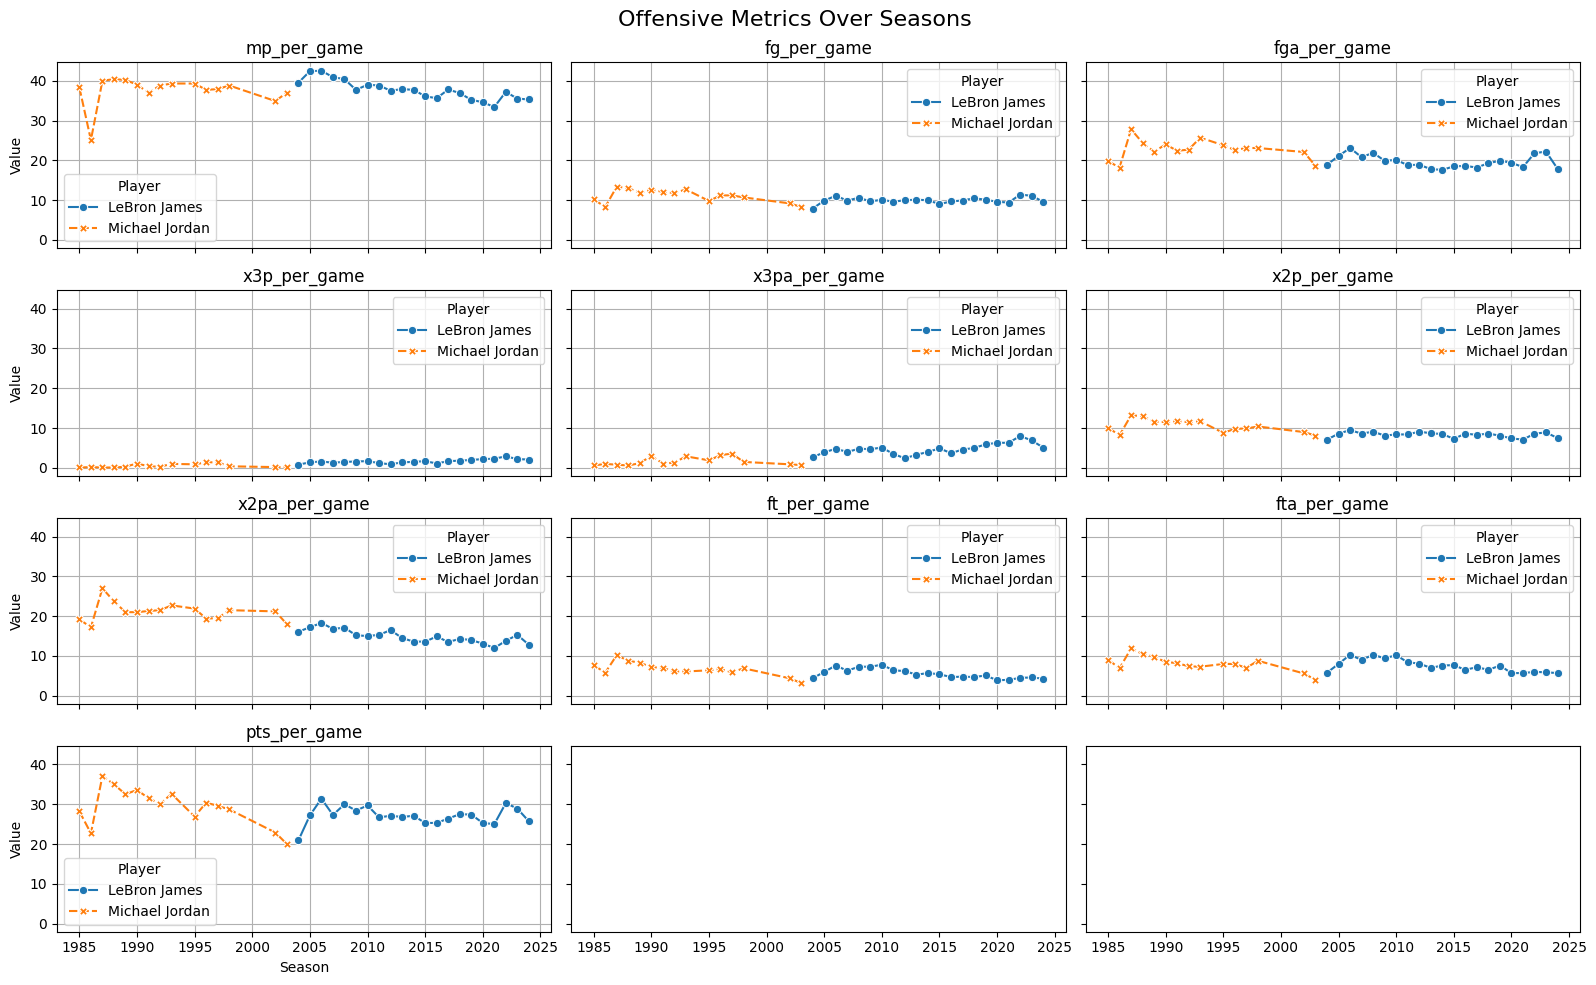

In [6]:
fig, axes = plt.subplots(4,3, figsize=(16, 10), sharex=True, sharey=True)
fig.suptitle('Offensive Metrics Over Seasons', fontsize=16)
axes = axes.flatten()

for ax, metric in zip(axes, offense_metrics):
    melted_df = combined.melt(id_vars=['player', 'season'], value_vars=[metric], var_name='metric', value_name='val')
    sns.lineplot(data=melted_df, x='season', y='val', hue='player', style='player', markers=True, ax=ax)
    ax.set_title(metric)
    ax.set_xlabel('Season')
    ax.set_ylabel('Value')
    ax.legend(title='Player')
    ax.grid(True)

plt.tight_layout()
plt.show()

##### Analysis
We can see that both players have relatively similar graphs for things such as minutes played per game (mp_per_game), field goals per game (fg_per_game), free throws per game (ft_per_game), and free throws attempted per game (fta_per_game). They differ slightly in areas such as field goals attempted per game (fga_per_game), with Jordan attempting more shots per game on average, and also having slightly more points on average (pts_per_game). We can also see a difference in their shooting, as Jordan has more 2 points attempted and made per game (x2pa_per_game, x2p_per_game), while LeBron has more 3 pointers attempted and made per game (x3pa_per_game, x3p_per_game). Possible reasons for this can be the shift in eras, as the three-point line was added relatively early in the NBA in terms of Jordan's career, hence players would be inexperienced compared to today's era, where shooting beyond the arc has become more prevalent. Additionally, I noticed that there is a sharp downward spike during the 1985-86 season in terms of minutes played, shots taken, and points per game, which can be attributed to his foot injury early in the season.

### Defensive Metrics

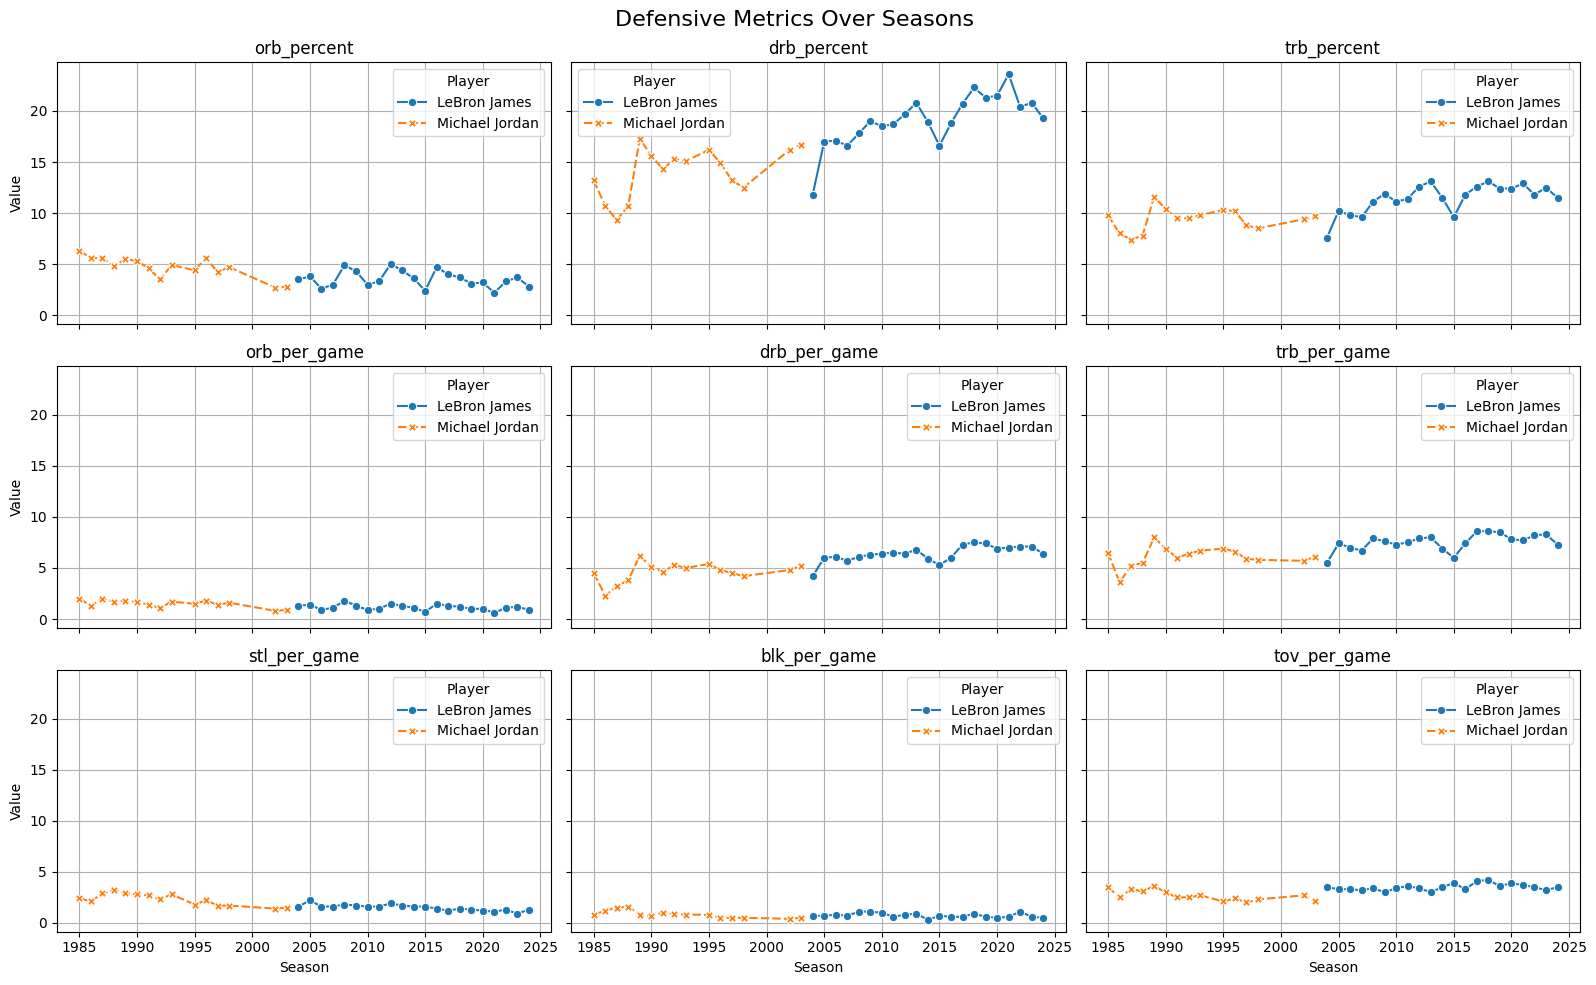

In [7]:
fig, axes = plt.subplots(3,3, figsize=(16, 10), sharex=True, sharey=True)
fig.suptitle('Defensive Metrics Over Seasons', fontsize=16)
axes = axes.flatten()

for ax, metric in zip(axes, defense_metrics):
    melted_df = combined.melt(id_vars=['player', 'season'], value_vars=[metric], var_name='metric', value_name='val')
    sns.lineplot(data=melted_df, x='season', y='val', hue='player', style='player', markers=True, ax=ax)
    ax.set_title(metric)
    ax.set_xlabel('Season')
    ax.set_ylabel('Value')
    ax.legend(title='Player')
    ax.grid(True)

plt.tight_layout()
plt.show()

##### Analysis
Unlike offense, there seem to be increased disparity between the two in terms of defensive statistics. They seem to average a similar number of blocks per game (blk_per_game), steals per game (stl_per_game) with Jordan having an edge, offensive rebounds per game (orb_per_game), and offensive rebound percentage (orb_percent), where Jordan again has a slight edge. LeBron appears to have an edge in defensive rebound percentage (drb_percent), defensive rebounds per game (drb_per_game), total rebound percentage (trb_percent), total rebounds per game (trb_per_game), and turnovers per game (tov_per_game). This information suggests that they both were relatively similar in terms of defense, averaging similar blocks and steals per game, however, LeBron seems to be the better rebounder, as he leads in multiple rebounding metrics. LeBron does also lead in turnovers, which goes in Jordan's favor.

### Efficiency Metrics

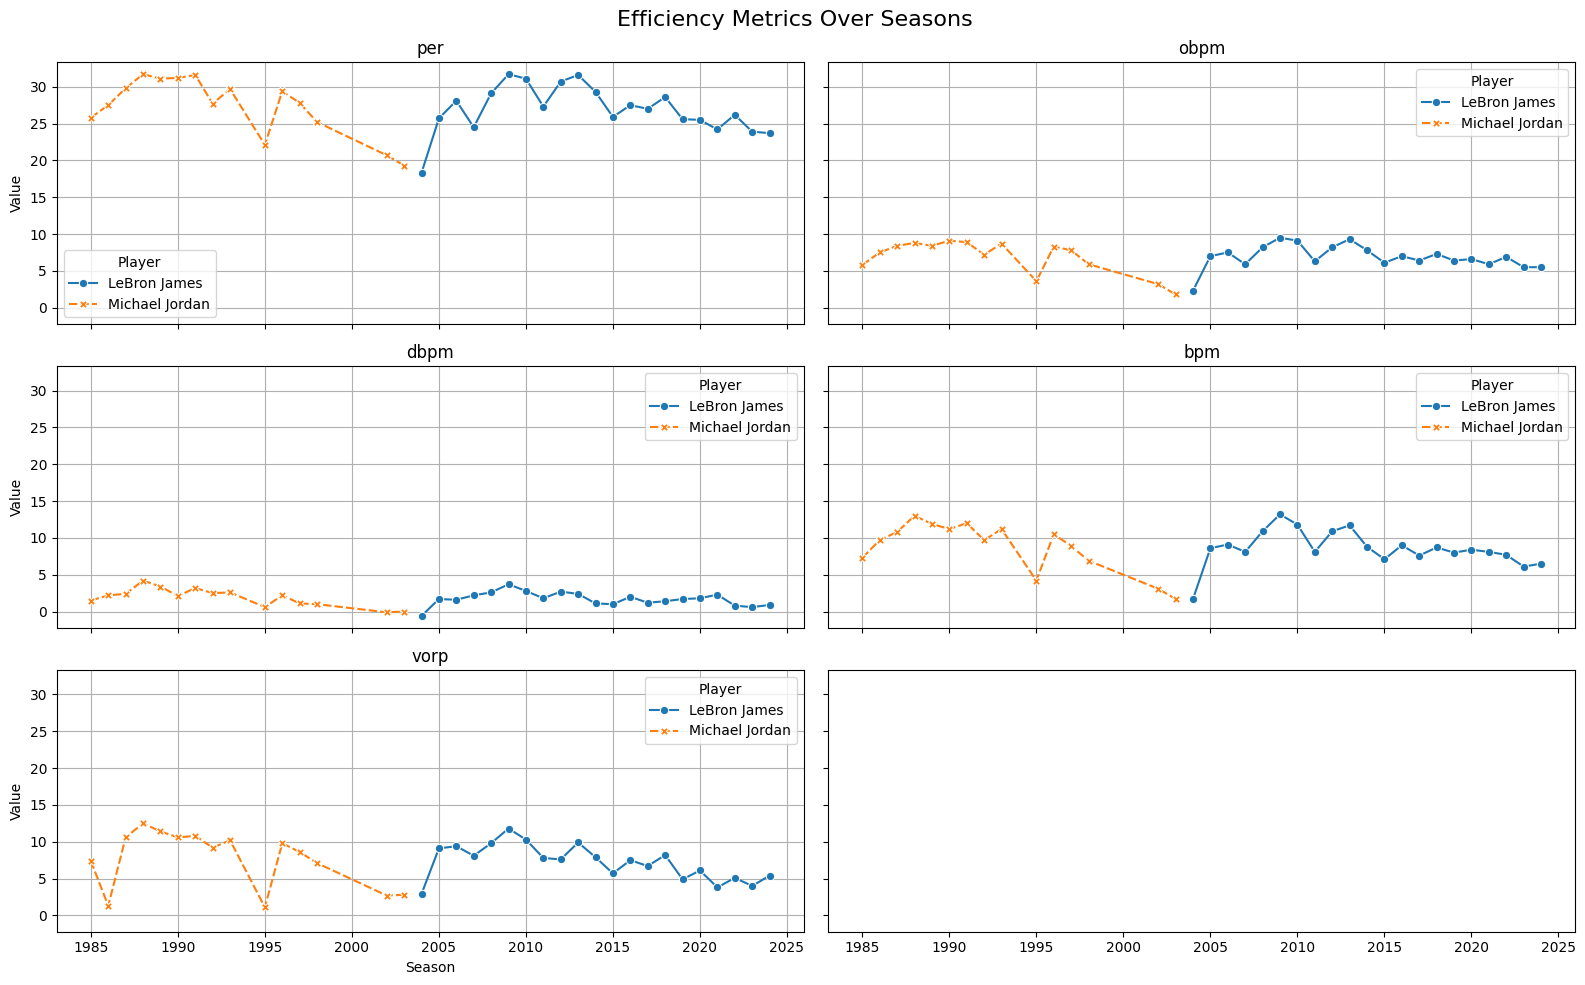

In [8]:
fig, axes = plt.subplots(3,2, figsize=(16, 10), sharex=True, sharey=True)
fig.suptitle('Efficiency Metrics Over Seasons', fontsize=16)
axes = axes.flatten()

for ax, metric in zip(axes, efficiency_metrics):
    melted_df = combined.melt(id_vars=['player', 'season'], value_vars=[metric], var_name='metric', value_name='val')
    sns.lineplot(data=melted_df, x='season', y='val', hue='player', style='player', markers=True, ax=ax)
    ax.set_title(metric)
    ax.set_xlabel('Season')
    ax.set_ylabel('Value')
    ax.legend(title='Player')
    ax.grid(True)

plt.tight_layout()
plt.show()

##### Analysis
Looking at these efficiency metrics, it seems that both players seem to have very similar plus-minus profiles for both offense and defense (obpm, dbpm, bpm), suggesting they both had very similar impacts on the game while they were on the court. Both players also have high performance efficiency rating values (per), primarily within the 25-30 range, which is much greater than the league average of 15. They also have similar vorps, which is value over replacement players, suggesting that they provided much more value than their counterparts on the court. There is one notable dip in Michael Jordan's statistics for all of these charts in the year 1995, which suggests that he did not individually contribute as much towards the team's success. This is likely the case as he retired following his championship win in 1993, and then returned in March 1995, near the end of the regular season.

### Shooting Percentage Metrics

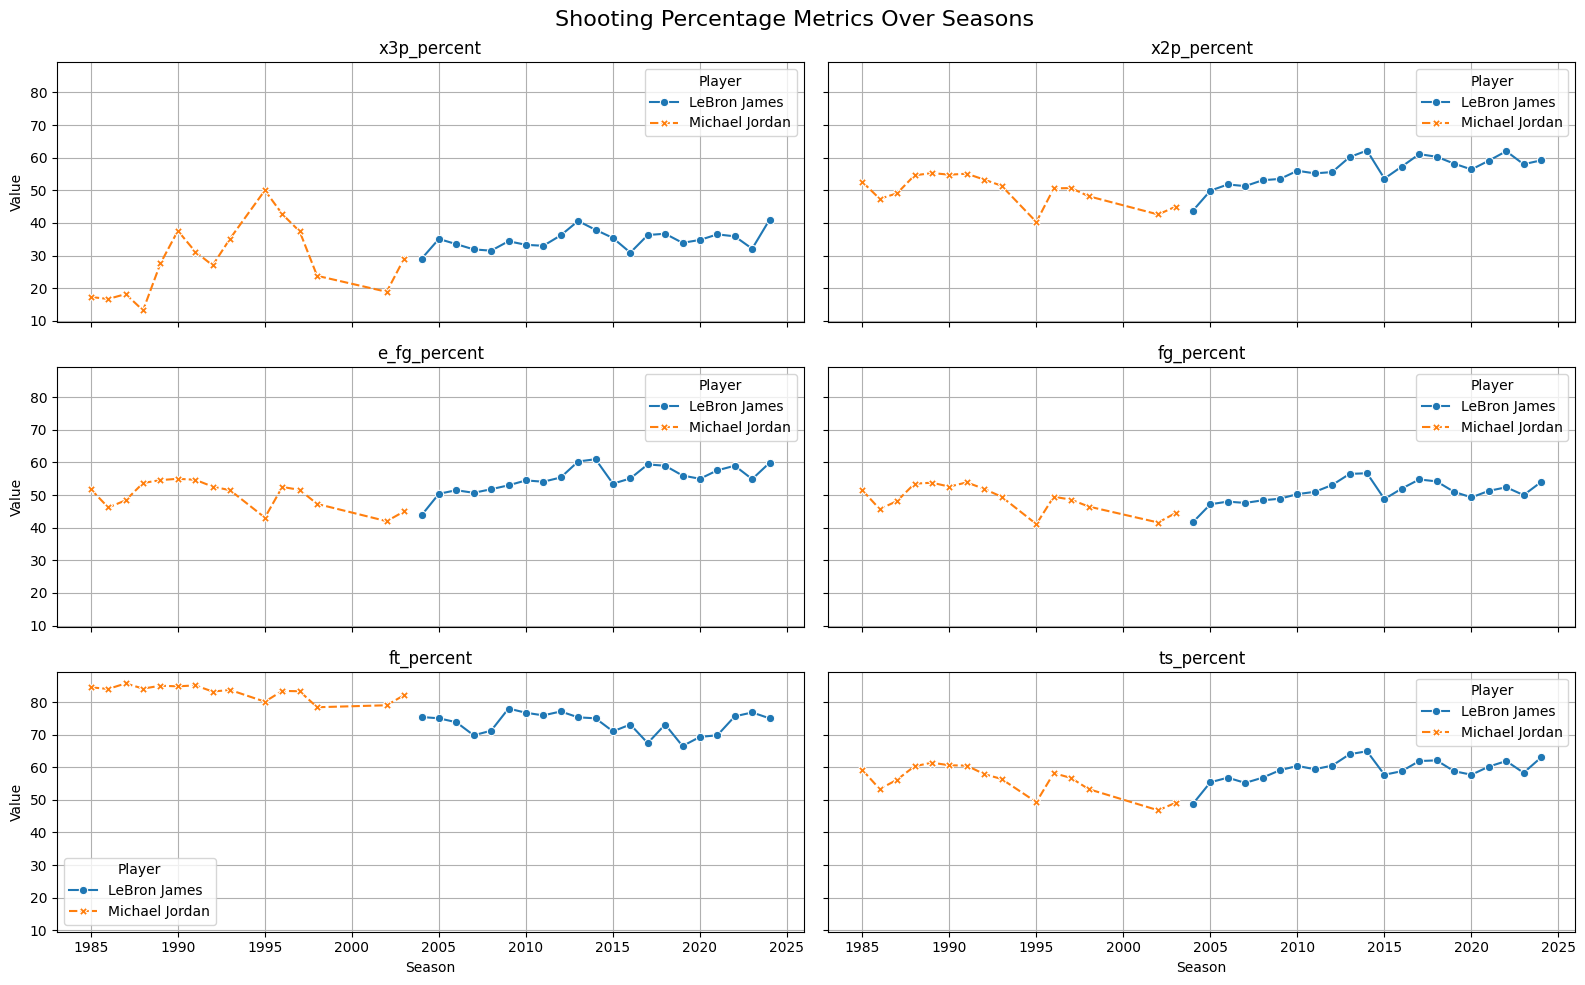

In [9]:
fig, axes = plt.subplots(3,2, figsize=(16, 10), sharex=True, sharey=True)
fig.suptitle('Shooting Percentage Metrics Over Seasons', fontsize=16)
axes = axes.flatten()

for ax, metric in zip(axes, other_percentages):
    melted_df = combined.melt(id_vars=['player', 'season'], value_vars=[metric], var_name='metric', value_name='val')
    sns.lineplot(data=melted_df, x='season', y='val', hue='player', style='player', markers=True, ax=ax)
    ax.set_title(metric)
    ax.set_xlabel('Season')
    ax.set_ylabel('Value')
    ax.legend(title='Player')
    ax.grid(True)

plt.tight_layout()
plt.show()

##### Analysis
We can see a lot of similarties and a few differences between the two players through these graphs. Firstly, both players have similar numbers for effective field goal percentage (e_fg_percent), field goal percentage (fg_percent), and true shooting percentage (ts_percent) with LeBron having a slight edge in them all. Jordan has better numbers for free throw percentage (ft_percent), however, he is outshined by LeBron in terms of 2 point percentage (x2p_percent). In terms of 3 point percentage (x3p_percent), they both have a similar average, however, LeBron's graph appears to be more consistent while Jordan's has high peaks and low troughs. The 3 point percentage of Jordan in 1995 seems like an abberation, but it is most likely due to him returning late in the regular season (as mentioned earlier) and only playing a total of 17 games, which is a low sample size and can therefore inflate his statistics. 

## Finals Performances

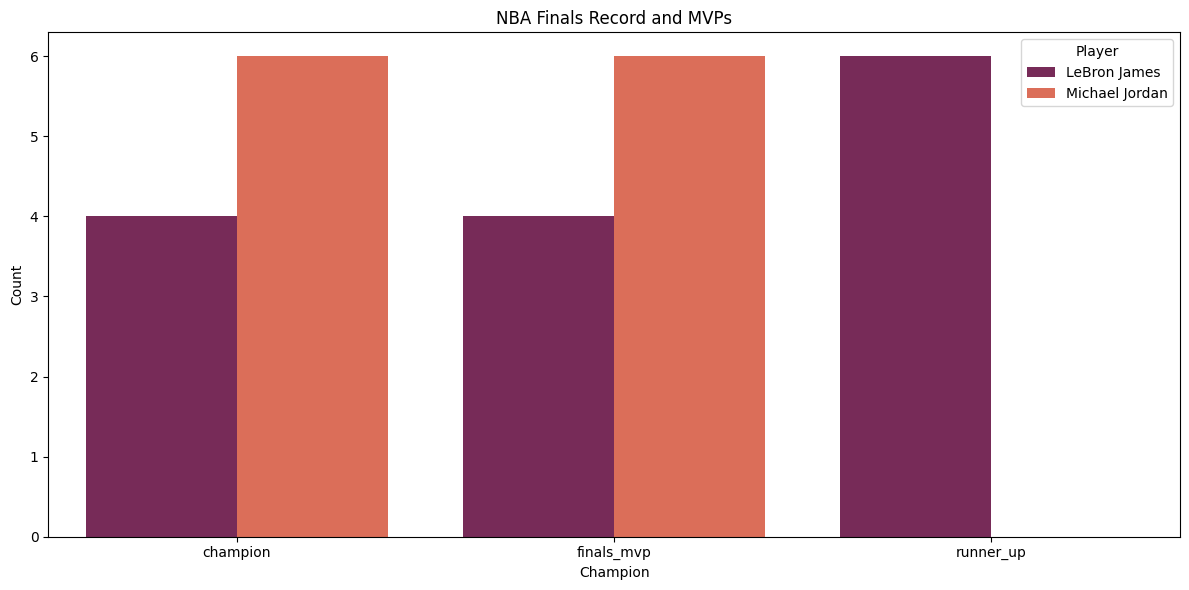

In [10]:
wins = ['champion','finals_mvp','runner_up']
players = ['LeBron James', 'Michael Jordan']
data = []
for win in wins:
    for player in players:
        count = combined[(combined.player == player) & (combined[win] == True)].shape[0]
        data.append({'Accolades': win, 'Player': player, 'Count': count})
championships_df = pd.DataFrame(data)

plt.figure(figsize=(12,6))
sns.barplot(x="Accolades", y="Count", hue="Player", data=championships_df, palette="rocket")
plt.title("NBA Finals Record and MVPs")
plt.xlabel("Champion")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

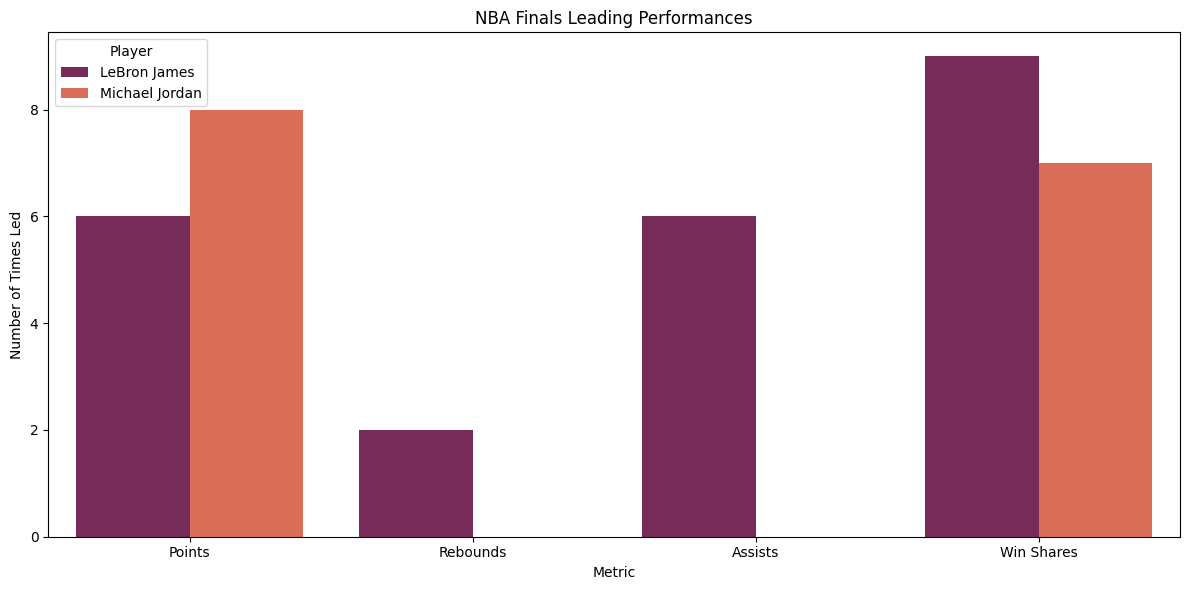

In [11]:
metrics = ['Points_name', 'Rebounds_name', 'Assists_name', 'Win Shares_name']
players = ['LeBron James', 'Michael Jordan']
data = []
for metric in metrics:
    for player in players:
        count = combined[metric].eq(player).sum()
        data.append({'Metric': metric.split('_')[0], 'Player': player, 'Count': count})
finals_performances = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Count', hue='Player', data=finals_performances, palette="rocket")
plt.title('NBA Finals Leading Performances')
plt.xlabel('Metric')
plt.ylabel('Number of Times Led')
plt.tight_layout()
plt.show()

##### Analysis
Looking at both the graphs above, we can see a few things. From the first graph, it appears that Michael Jordan has won 2 more championships and has 2 more finals MVP awards than LeBron does. We can also see that LeBron has been a runner up in the finals 6 times, while Jordan has never lost a finals. Looking at the second graph, we can see that Jordan has led in points 2 times more in the finals than LeBron has, but has not led in any of the other metrics. LeBron also appears to have more win shares than Jordan, which suggests he has contributed more to his team's success. 

###### Side Note: This graphic includes the series from the Eastern and Western Conference Finals, hence why Jordan lead in points 8 times despite only making the NBA finals 6 times


C:\Users\tanma\AppData\Local\Temp\ipykernel_4756\2905162354.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_award = df_award[df_award.player.isin(["Michael Jordan", "LeBron James"])][df_award.winner == True].groupby(["award", "player"]).count()


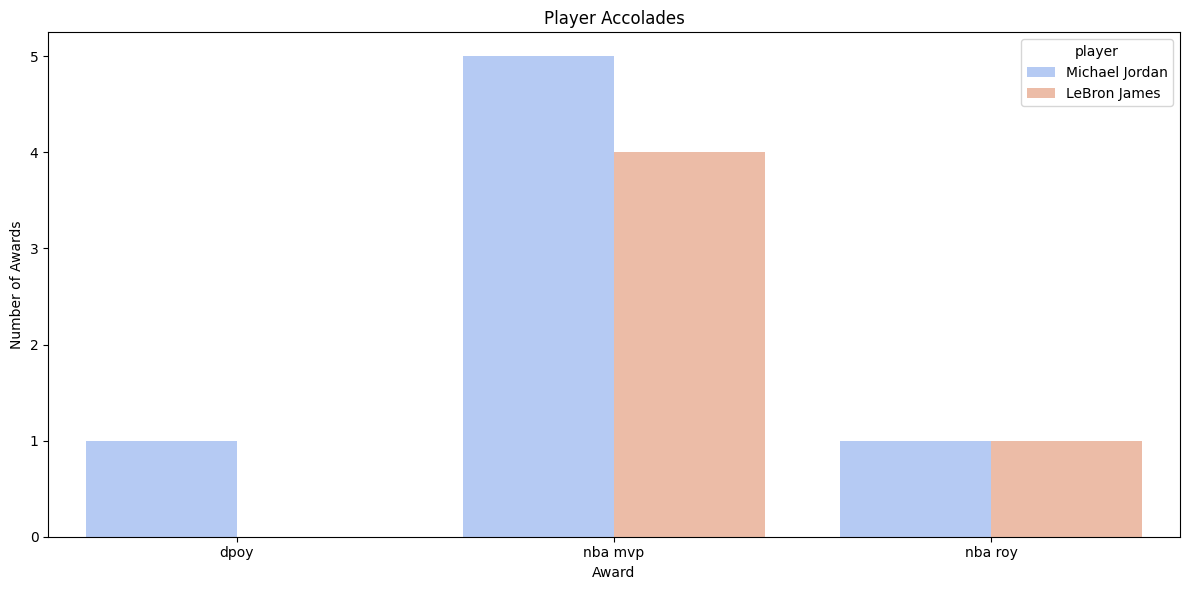

In [12]:
df_award = pd.read_csv("NBA Stats (1947-present)/Player Award Shares.csv")
df_award = df_award[df_award.player.isin(["Michael Jordan", "LeBron James"])][df_award.winner == True].groupby(["award", "player"]).count()
df_award = df_award.reset_index()
df_award = df_award.melt(id_vars=['award', 'player'], var_name='category', value_name='count')

plt.figure(figsize=(12,6))
sns.barplot(x="award", y="count", hue="player", data=df_award, palette="coolwarm")
plt.title("Player Accolades")
plt.xlabel("Award")
plt.ylabel("Number of Awards")
plt.tight_layout()
plt.show()

##### Analysis
Looking at the graph, we can see that Michael Jordan has more accolades than LeBron, having a Defensive Player of the Year Award (dpoy), and having one more Most Valuable Player Award (nba mvp). Both players have won Rookie of the Year, and have been playing at the highest level since.

## Overall Thoughts and Verdict

After gathering all this information and taking everything into account, I personally believe that the greatest NBA player of all time is: LeBron James. Although both players are truly great in their respective eras, I believe that LeBron takes the edge over Jordan. Statistically, Jordan is the better scorer and has cemented himself to be one of the best players of all time, but scoring is not the only factor which should be considered. LeBron is a much more well-rounded player than him, maintaining good scoring while providing significant value to his team in other ways such as rebounds, assists, and defense. Granted, Jordan does have more accolades and a much better finals record than LeBron, however, it should be taken into account that basketball is a TEAM sport, and no one player can win championships all on their own. We can see this through the aforementioned data, as LeBron has played for 3 different teams throughout his career, and won at least one championship for each team, while also having more finals appearances than Jordan did, and leading in multiple categories in the finals. Both players have been extremely influential and had a generational impact on the game of basketball, setting the bar and inspiring new talent, but I strongly believe that the title of the greatest basketball player of all time belongs to LeBron James.